# Linear Regression with one variable

## 1 - Packages ##

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 2 - Overview of the Problem set ##

In [ ]:
def load_data():
    from sklearn.model_selection import train_test_split

    data = np.genfromtxt('kangaroo.csv', delimiter=',')
    
    x = data[:, 0]
    y = data[:, 1]
    
    train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(x, y, test_size=0.33, random_state=42)
        
    return train_set_x, test_set_x, train_set_y, test_set_y

train_set_x, test_set_x, train_set_y, test_set_y = load_data()

In [ ]:
print (train_set_x.shape, test_set_x.shape, train_set_y.shape, test_set_y.shape)

(30,) (15,) (30,) (15,)


In [ ]:
m_train = len(train_set_x)
m_test = len(test_set_x)

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 30
Number of testing examples: m_test = 15
train_set_x shape: (30,)
train_set_y shape: (30,)
test_set_x shape: (15,)
test_set_y shape: (15,)


### Data visualization

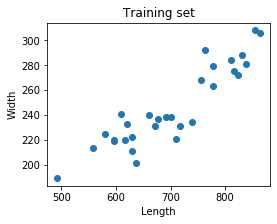

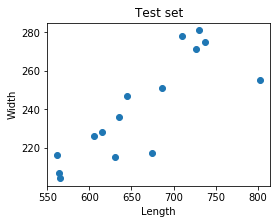

In [ ]:
# Training set
plt.figure(figsize=(4, 3))
plt.scatter(train_set_x, train_set_y)
plt.title("Training set")
plt.xlabel("Length")
plt.ylabel("Width");

# Test set
plt.figure(figsize=(4, 3))
plt.scatter(test_set_x, test_set_y)
plt.title("Test set")
plt.xlabel("Length")
plt.ylabel("Width");

### Standardization

In [ ]:
mean = np.concatenate([train_set_x,test_set_x]).mean()
std = np.concatenate([train_set_x,test_set_x]).std()

train_set_x = (train_set_x - mean) / std
test_set_x = (test_set_x - mean) / std

### Standardized data visualization

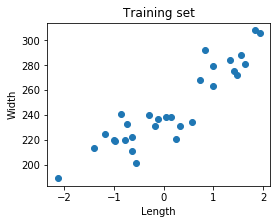

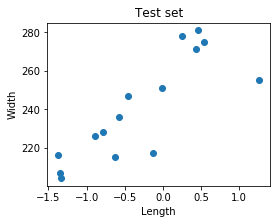

In [ ]:
plt.figure(figsize=(4, 3))
plt.scatter(train_set_x, train_set_y)
plt.title("Training set")
plt.xlabel("Length")
plt.ylabel("Width");

plt.figure(figsize=(4, 3))
plt.scatter(test_set_x, test_set_y)
plt.title("Test set")
plt.xlabel("Length")
plt.ylabel("Width");

## 3 - Building the parts of our algorithm ## 

### 3.1 - Initializing parameters

In [ ]:
def initialize_with_zeros():
    
    theta = 0
    b = 0

    assert(isinstance(theta, int))
    assert(isinstance(b, int))
    
    return theta, b

In [ ]:
theta, b = initialize_with_zeros()
print ("theta = " + str(theta))
print ("b = " + str(b))

theta = 0
b = 0


### 3.2 - Forward and Backward propagation

In [ ]:
def propagate(theta, b, X, Y):
    
    m = X.shape[0]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    H = (X.dot(theta) + b)        # compute activation
    cost = (1/(2*m))*np.sum(np.square(H - Y))    # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dt = (1/m)*X.T.dot(H - Y)
    db = (1/m)*np.sum(H - Y)
    
    assert(dt.dtype == float)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dt": dt,
             "db": db}
    
    return grads, cost

In [ ]:
theta, b, X, Y = 1., 2., np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]), np.array([2, 3, 4, 5, 6, 7])
grads, cost = propagate(theta, b, X, Y)
print ("dt = " + str(grads["dt"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dt = -1.015
db = -2.15
cost = 3.4925


### 4.3 - Optimization

In [ ]:
def optimize(theta, b, X, Y, num_iterations, learning_rate, print_cost=True):
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
        grads, cost = propagate(theta, b, X, Y)

        # Retrieve derivatives from grads
        dt = grads["dt"]
        db = grads["db"]
        
        # update rule
        theta = theta - learning_rate*dt
        b = b - learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"theta": theta,
              "b": b}
    
    grads = {"dt": dt,
             "db": db}
    
    return params, grads, costs

In [ ]:
params, grads, costs = optimize(theta, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)
print ("theta = " + str(params["theta"]))
print ("b = " + str(params["b"]))
print ("dt = " + str(grads["dt"]))
print ("db = " + str(grads["db"]))

theta = 0.2569832402234635
b = 4.499999999986747
dt = -5.551115123125783e-16
db = -1.337441268844941e-11


In [ ]:
def predict(theta, b, X):
    
    Y_prediction = X.dot(theta) + b
    
    return Y_prediction

In [ ]:
theta = 0.1124579
b = -0.3
X = np.array([1., -1.1, -3.2, 1.2, 2., 0.1])
print ("predictions = " + str(predict(theta, b, X)))

predictions = [-0.1875421  -0.42370369 -0.65986528 -0.16505052 -0.0750842  -0.28875421]


## 4 - Merge all functions into a model ##

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=True):
    
    
    # initialize parameters with zeros
    theta, b = initialize_with_zeros()

    # Gradient descent
    parameters, grads, costs = optimize(theta, b, X_train, Y_train, num_iterations, learning_rate, print_cost=True)
    
    # Retrieve parameters w and b 
    theta = parameters["theta"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(theta, b, X_test)
    Y_prediction_train = predict(theta, b, X_train)

    # Print train/test Errors
    print ("Train RMSE: {} ".format(np.sqrt(np.mean((Y_prediction_train - Y_train) ** 2))))
    print ("Test RMSE: {} ".format(np.sqrt(np.mean((Y_prediction_test - Y_test) ** 2))))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "theta" : theta, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=500, learning_rate=0.05, print_cost=True)

Cost after iteration 0: 30753.266667
Cost after iteration 100: 89.390351
Cost after iteration 200: 87.787635
Cost after iteration 300: 87.787489
Cost after iteration 400: 87.787489
Train RMSE: 13.25047088422024 
Test RMSE: 16.204215320597264 


### The result

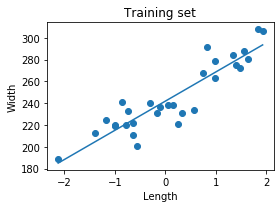

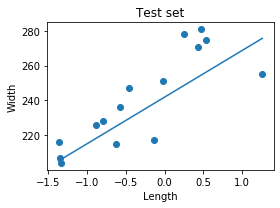

In [ ]:
# Training set
plt.figure(figsize=(4, 3))
plt.title("Training set")

plt.scatter(train_set_x, train_set_y)
x = np.array([min(train_set_x), max(train_set_x)])
theta = d["theta"]
b = d["b"]
y = theta * x + b
plt.plot(x, y)  
plt.axis("tight")
plt.xlabel("Length")
plt.ylabel("Width");
plt.tight_layout()


# Test set
plt.figure(figsize=(4, 3))
plt.title("Test set")

plt.scatter(test_set_x, test_set_y)
x = np.array([min(test_set_x), max(test_set_x)])
theta = d["theta"]
b = d["b"]
y = theta * x + b
plt.plot(x, y)  
plt.axis("tight")
plt.xlabel("Length")
plt.ylabel("Width");
plt.tight_layout()